In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
from google.colab import files 
uploaded= files.upload()

Saving POWER_Point_Daily_20190101_20210305_022d6471N_077d9231E_LST.csv to POWER_Point_Daily_20190101_20210305_022d6471N_077d9231E_LST (4).csv


In [ ]:
df=pd.read_csv(io.StringIO(uploaded['POWER_Point_Daily_20190101_20210305_022d6471N_077d9231E_LST.csv'].decode('utf-8')))

In [ ]:
df.head()

,YEAR,MO,DY,T2M
0,2019,1,1,20.12
1,2019,1,2,20.47
2,2019,1,3,18.45
3,2019,1,4,19.44
4,2019,1,5,19.57


In [ ]:
import fbprophet

In [ ]:
df.describe()

,YEAR,MO,DY,T2M
count,731.000000,731.000000,731.000000,731.000000
mean,2019.500684,6.519836,15.738714,25.487428
std,0.500342,3.451913,8.809949,5.672436
min,2019.000000,1.000000,1.000000,11.450000
25%,2019.000000,4.000000,8.000000,21.210000
50%,2020.000000,7.000000,16.000000,25.420000
75%,2020.000000,10.000000,23.000000,28.190000
max,2020.000000,12.000000,31.000000,39.570000


In [ ]:

df.dtypes


YEAR      int64
MO        int64
DY        int64
T2M     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    731 non-null    int64  
 1   MO      731 non-null    int64  
 2   DY      731 non-null    int64  
 3   T2M     731 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 23.0 KB


In [ ]:
df.isnull().count()

YEAR    731
MO      731
DY      731
T2M     731
dtype: int64

In [ ]:
import datetime


In [ ]:
df["YEAR"]=df["YEAR"].astype(str)
df["MO"]=df["MO"].astype(str)
df["DY"]=df["DY"].astype(str)
df

,YEAR,MO,DY,T2M
0,2019,1,1,20.12
1,2019,1,2,20.47
2,2019,1,3,18.45
3,2019,1,4,19.44
4,2019,1,5,19.57
...,...,...,...,...
726,2020,12,27,19.54
727,2020,12,28,17.98
728,2020,12,29,16.59
729,2020,12,30,17.24


In [ ]:
df["Date"]=pd.to_datetime(df["YEAR"] + "/" + df["MO"] + "/" + df["DY"])
df

,YEAR,MO,DY,T2M,Date
0,2019,1,1,20.12,2019-01-01
1,2019,1,2,20.47,2019-01-02
2,2019,1,3,18.45,2019-01-03
3,2019,1,4,19.44,2019-01-04
4,2019,1,5,19.57,2019-01-05
...,...,...,...,...,...
726,2020,12,27,19.54,2020-12-27
727,2020,12,28,17.98,2020-12-28
728,2020,12,29,16.59,2020-12-29
729,2020,12,30,17.24,2020-12-30


In [ ]:
df.drop('MO',inplace=True,axis=1)
df.drop('DY',inplace=True,axis=1)
df.drop('YEAR',inplace=True,axis=1)

In [ ]:
df

,T2M,Date
0,20.12,2019-01-01
1,20.47,2019-01-02
2,18.45,2019-01-03
3,19.44,2019-01-04
4,19.57,2019-01-05
...,...,...
726,19.54,2020-12-27
727,17.98,2020-12-28
728,16.59,2020-12-29
729,17.24,2020-12-30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   T2M     731 non-null    float64       
 1   Date    731 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['temp'] = df['T2M']
df.head()

,T2M,Date,temp
0,20.12,2019-01-01,20.12
1,20.47,2019-01-02,20.47
2,18.45,2019-01-03,18.45
3,19.44,2019-01-04,19.44
4,19.57,2019-01-05,19.57


In [ ]:
df.drop('T2M',inplace=True,axis=1)

In [ ]:
df

,Date,temp
0,2019-01-01,20.12
1,2019-01-02,20.47
2,2019-01-03,18.45
3,2019-01-04,19.44
4,2019-01-05,19.57
...,...,...
726,2020-12-27,19.54
727,2020-12-28,17.98
728,2020-12-29,16.59
729,2020-12-30,17.24


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2019-01-01,20.12
1,2019-01-02,20.47
2,2019-01-03,18.45
3,2019-01-04,19.44
4,2019-01-05,19.57


In [ ]:
from fbprophet import Prophet

In [ ]:
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
1091,2021-12-27
1092,2021-12-28
1093,2021-12-29
1094,2021-12-30
1095,2021-12-31


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,26.270965,15.242331,19.610157,26.270965,26.270965,-8.868998,-8.868998,-8.868998,0.181655,0.181655,0.181655,-9.050653,-9.050653,-9.050653,0.0,0.0,0.0,17.401967
1,2019-01-02,26.268966,14.899243,19.577745,26.268966,26.268966,-8.807047,-8.807047,-8.807047,0.203215,0.203215,0.203215,-9.010263,-9.010263,-9.010263,0.0,0.0,0.0,17.461918
2,2019-01-03,26.266966,15.219349,19.491618,26.266966,26.266966,-8.907341,-8.907341,-8.907341,0.048867,0.048867,0.048867,-8.956208,-8.956208,-8.956208,0.0,0.0,0.0,17.359625
3,2019-01-04,26.264966,15.040333,19.482682,26.264966,26.264966,-8.968788,-8.968788,-8.968788,-0.078318,-0.078318,-0.078318,-8.890471,-8.890471,-8.890471,0.0,0.0,0.0,17.296177
4,2019-01-05,26.262966,14.898046,19.303415,26.262966,26.262966,-9.061470,-9.061470,-9.061470,-0.246292,-0.246292,-0.246292,-8.815178,-8.815178,-8.815178,0.0,0.0,0.0,17.201496


In [ ]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,26.270965,15.242331,19.610157,26.270965,26.270965,-8.868998,-8.868998,-8.868998,0.181655,0.181655,0.181655,-9.050653,-9.050653,-9.050653,0.0,0.0,0.0,17.401967
1,2019-01-02,26.268966,14.899243,19.577745,26.268966,26.268966,-8.807047,-8.807047,-8.807047,0.203215,0.203215,0.203215,-9.010263,-9.010263,-9.010263,0.0,0.0,0.0,17.461918
2,2019-01-03,26.266966,15.219349,19.491618,26.266966,26.266966,-8.907341,-8.907341,-8.907341,0.048867,0.048867,0.048867,-8.956208,-8.956208,-8.956208,0.0,0.0,0.0,17.359625
3,2019-01-04,26.264966,15.040333,19.482682,26.264966,26.264966,-8.968788,-8.968788,-8.968788,-0.078318,-0.078318,-0.078318,-8.890471,-8.890471,-8.890471,0.0,0.0,0.0,17.296177
4,2019-01-05,26.262966,14.898046,19.303415,26.262966,26.262966,-9.061470,-9.061470,-9.061470,-0.246292,-0.246292,-0.246292,-8.815178,-8.815178,-8.815178,0.0,0.0,0.0,17.201496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,30.907452,19.469637,24.164560,29.986973,31.890330,-9.010592,-9.010592,-9.010592,-0.001279,-0.001279,-0.001279,-9.009313,-9.009313,-9.009313,0.0,0.0,0.0,21.896860
1092,2021-12-28,30.918926,19.667390,24.418545,29.995011,31.904793,-8.871601,-8.871601,-8.871601,0.181655,0.181655,0.181655,-9.053256,-9.053256,-9.053256,0.0,0.0,0.0,22.047325
1093,2021-12-29,30.930400,19.712737,24.486581,30.003049,31.919511,-8.874483,-8.874483,-8.874483,0.203215,0.203215,0.203215,-9.077698,-9.077698,-9.077698,0.0,0.0,0.0,22.055917
1094,2021-12-30,30.941875,19.344667,24.119970,30.011160,31.939506,-9.034388,-9.034388,-9.034388,0.048867,0.048867,0.048867,-9.083255,-9.083255,-9.083255,0.0,0.0,0.0,21.907487


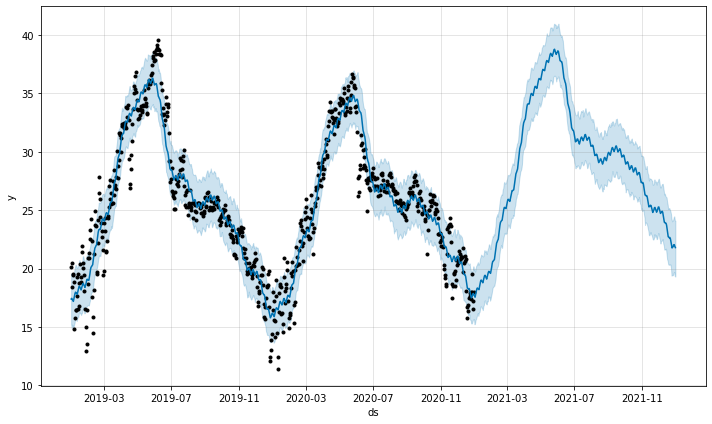

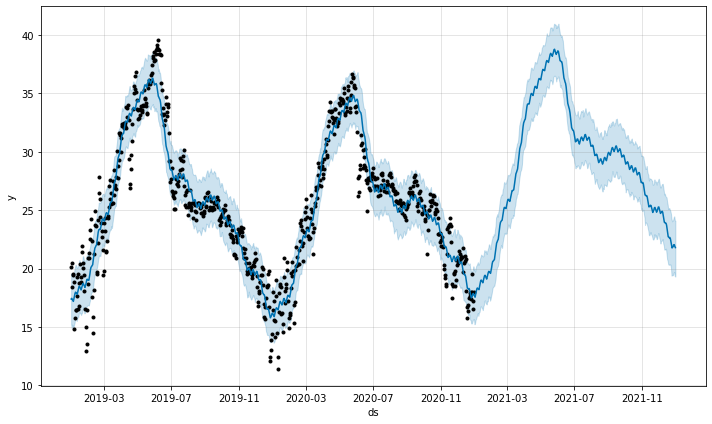

In [ ]:
model.plot(prediction)

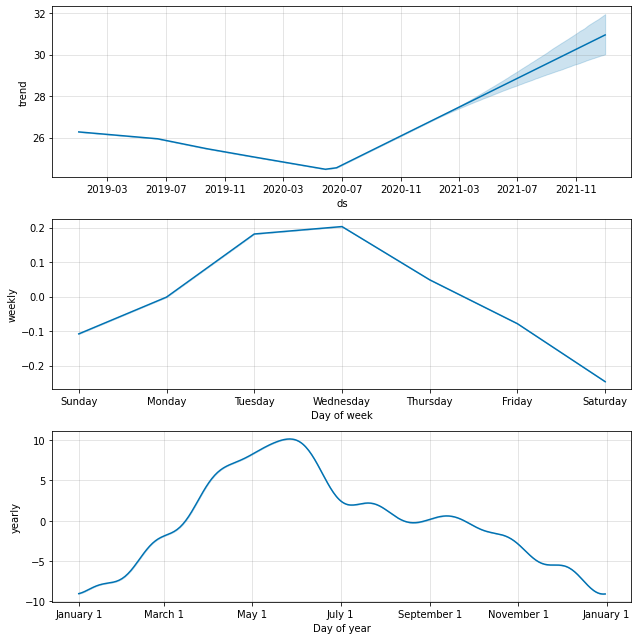

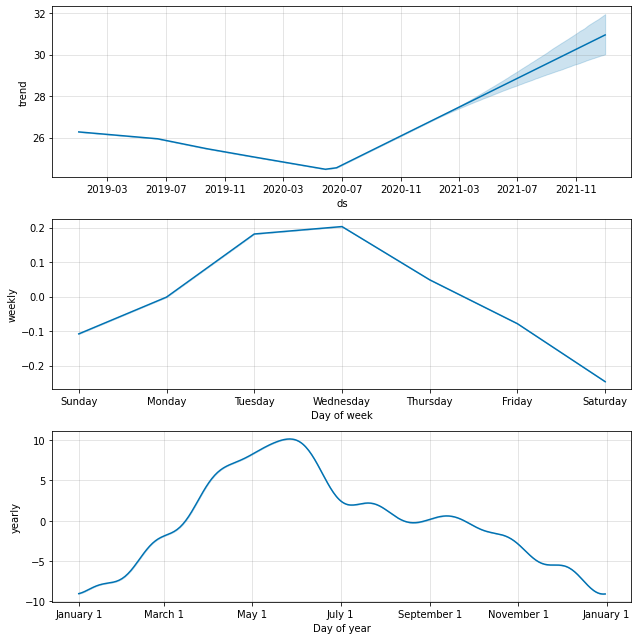

In [ ]:
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial = "365 days",period="180 days" ,horizon = "365 days")
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-01-01 00:00:00 and 2020-01-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-02,14.674286,12.704478,16.613261,18.02,2020-01-01
1,2020-01-03,14.463911,12.466049,16.456387,17.27,2020-01-01
2,2020-01-04,14.273385,12.325885,16.333212,15.63,2020-01-01
3,2020-01-05,14.361496,12.472465,16.462019,14.11,2020-01-01
4,2020-01-06,14.297593,12.324037,16.183833,15.48,2020-01-01


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,11.550895,3.398661,2.953198,0.164193,0.177032,0.305556
1,37 days,11.635847,3.411136,2.965128,0.164337,0.177032,0.305556
2,38 days,11.431498,3.381050,2.907165,0.161009,0.177032,0.333333
3,39 days,11.418762,3.379166,2.902135,0.160722,0.177032,0.333333
4,40 days,11.421071,3.379507,2.905776,0.160846,0.177032,0.333333


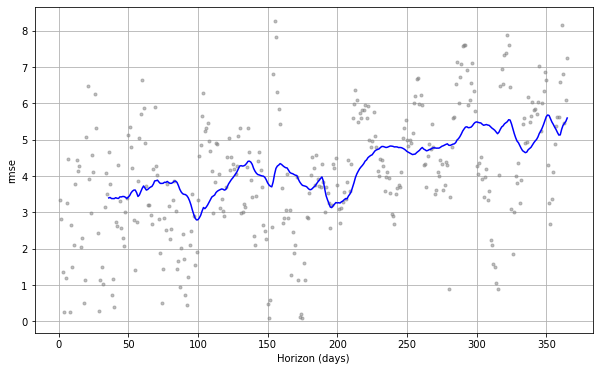

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')